In [2]:
!conda install -y gdown

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - rapidsai/linux-64::libcuml==21.12.00=cuda11_g04c4927f3_0
  - conda-forge/linux-64::abseil-cpp==20211102.0=h93e1e8c_3
  - rapidsai/linux-64::dask-cudf==21.12.02=cuda_11_py37_g06540b9b37_0
  - conda-forge/linux-64::pyarrow==5.0.0=py37h8cf84b7_35_cuda
  - rapidsai/linux-64::cuml==21.12.00=cuda11_py37_g04c4927f3_0
  - conda-forge/linux-64::grpc-cpp==1.45.2=he70e3f0_3
  - rapidsai/linux-64::libcudf==21.12.02=cuda11_g06540b9b37_0
  - conda-forge/linux-64::arrow-cpp==5.0.0=py37h846d386_35_cuda
  - rapidsai/linux-64::cudf==21.12.02=cuda_11_py37_g06540b9b37_0
  - conda-forge/noarch::parquet-cpp==1.5.1=2
  - conda-forge/linux-64::libabseil==20211102.0=cxx17_h48a1fff_3
done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c conda-

In [3]:
!gdown --id 1hHbLr2xVEE3VWBWRhoCzsx5X9tvcBhBG

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:130: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From (uriginal): https://drive.google.com/uc?id=1hHbLr2xVEE3VWBWRhoCzsx5X9tvcBhBG
From (redirected): https://drive.google.com/uc?id=1hHbLr2xVEE3VWBWRhoCzsx5X9tvcBhBG&confirm=t&uuid=e9fa40bc-ff6b-4e43-910b-4b1d2be85cf2
To: /kaggle/working/final_train.csv
100%|███████████████████████████████████████| 1.34G/1.34G [00:09<00:00, 148MB/s]


In [4]:
!gdown --id 1EvWL3v1mxTTQ7yTG5juQTHxUn6YEavcm

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:130: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1EvWL3v1mxTTQ7yTG5juQTHxUn6YEavcm
To: /kaggle/working/labeled_train.csv
100%|███████████████████████████████████████| 2.03M/2.03M [00:00<00:00, 131MB/s]


In [5]:
!nvidia-smi

Mon May 29 23:35:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import catboost as cbt
import xgboost as xgb
import time

from statistics import mode

In [7]:
x=pd.read_csv("/kaggle/working/final_train.csv")

In [8]:
labeled_train=pd.read_csv("/kaggle/working/labeled_train.csv")

In [9]:
y=labeled_train["label"]

In [10]:
X_train , X_cv , y_train , y_cv = train_test_split(x, y, stratify = y,
                                                       random_state = 5, test_size = 0.1)

In [12]:
y_train.shape

(914416,)

#  Train Xgboost model and Hyperparameter Optimization 

**XGBoost is a powerful machine learning algorithm known for its efficiency and accuracy in handling various types of data. It is particularly effective in solving complex classification and regression problems. When training an XGBoost model, it is essential to optimize its hyperparameters to achieve the best performance. Hyperparameter optimization involves finding the optimal values for parameters such as the learning rate, maximum depth, and number of estimators. This optimization process helps to fine-tune the model and improve its predictive capabilities.**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     88770
           1       0.98      0.98      0.98     12832

    accuracy                           0.99    101602
   macro avg       0.99      0.99      0.99    101602
weighted avg       0.99      0.99      0.99    101602

Accuracy of XGBoost: 0.9946260900375977
Precision of XGBoost: 0.994622034634163
Recall of XGBoost: 0.9946260900375977
Average F1 of XGBoost: 0.9946239381227729
F1 of XGBoost for each type of attack: [0.99692505 0.97870515]


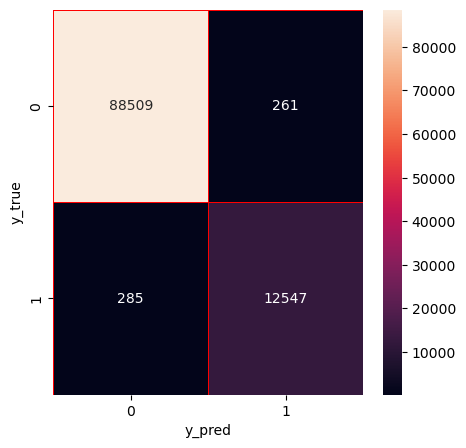

In [15]:
# Train the XGBoost algorithm
import xgboost as xgb
params = {'gamma': 0.4844789864786637, 'learning_rate': 0.21481377640824306, 'max_depth': 8, 
          'n_estimators': 183, 'subsample': 0.8447075483322914, 'eval_metric': 'auc', "tree_method":'gpu_hist'}
model = xgb.XGBClassifier(**params).fit(X_train, y_train)

y_pred = model.predict(X_cv)
print(classification_report(y_cv,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_cv, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_cv, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_cv, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_cv, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_cv, y_pred, average=None)))
xg_f1=f1_score(y_cv, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_cv,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [20]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [14]:
def bo_params_xgb(max_depth, gamma,learning_rate,n_estimators,subsample):
    
    params = {
        'max_depth': int(max_depth),
        'gamma': gamma,
        'learning_rate':learning_rate,
        'subsample': subsample,
        'eval_metric': 'auc',
        'n_estimators':int(n_estimators),
        "tree_method":'gpu_hist'
    }
    
    scores = cross_val_score(xgb.XGBClassifier(random_state=123, **params,use_label_encoder=False),
                             X_train, y_train,cv=5,scoring="accuracy").mean()
    return scores.mean()

In [15]:
xgb_bo = BayesianOptimization(bo_params_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                              'subsample':(0.5,1),
                                              'n_estimators':(100,200)
                                             })

In [16]:
results = xgb_bo.maximize(n_iter=80, init_points=20)

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 1         | 0.9938    | 0.6619    | 0.7471    | 5.752     | 154.1     | 0.8112    |
| 2         | 0.9936    | 0.5054    | 0.6887    | 9.672     | 170.0     | 0.6565    |
| 3         | 0.9935    | 0.8805    | 0.8425    | 5.007     | 119.4     | 0.7385    |
| 4         | 0.9932    | 0.9997    | 0.9029    | 8.928     | 145.1     | 0.6727    |
| 5         | 0.9941    | 0.3565    | 0.4869    | 6.647     | 184.2     | 0.9818    |
| 6         | 0.9942    | 0.11      | 0.1349    | 8.147     | 157.2     | 0.685     |
| 7         | 0.994     | 0.02058   | 0.2244    | 6.802     | 112.0     | 0.7544    |
| 8         | 0.9932    | 0.8298    | 0.9124    | 3.082     | 164.6     | 0.5266    |
| 9         | 0.9938    | 0.3969    | 0.7517    | 7.161     | 135.9     | 0.864     |
| 10        | 0.9933    | 0.2375    | 0.7398    | 6.36

In [17]:
params = xgb_bo.max['params']
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])
params['eval_metric'] = 'auc'
print(params)

{'gamma': 0.4844789864786637, 'learning_rate': 0.21481377640824306, 'max_depth': 8, 'n_estimators': 183, 'subsample': 0.8447075483322914, 'eval_metric': 'auc'}


In [17]:
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

# Train LGBM model and Hyperparameter Optimisation

**LightGBM (LGBM) is a popular gradient boosting framework known for its efficiency and ability to handle large-scale datasets. When training an LGBM model, hyperparameter optimization plays a crucial role in achieving optimal performance. Hyperparameter optimization involves systematically searching through a range of hyperparameter values to find the best combination that maximizes the model's accuracy or minimizes the error.**

In [18]:
import lightgbm as lgb

In [19]:
%%time

def bayes_parameter_opt_lgb(x, y, init_round=15, opt_round=25, n_folds=3, random_seed=6,n_estimators=10000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=x, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 30),
                                            'max_bin':(20,90),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(x, y, init_round=5, opt_round=10, n_folds=3, random_seed=6,n_estimators=10000)

|   iter    |  target   | baggin... | featur... | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] bagging_fraction is set=0.9895264513703341, subsample=0.4615201756036703 will be ignored. Current value: bagging_fraction=0.9895264513703341
[LightGBM] [Warning] bagging_fraction is set=0.9895264513703341, subsample=0.4615201756036703 will be ignored. Current value: bagging_fraction=0.9895264513703341
[LightGBM] [Warning] bagging_fraction is set=0.9895264513703341, subsample=0.4615201756036703 will be ignored. Current value: bagging_fraction=0.9895264513703341
[LightGBM] [Info] Number of positive: 85544, number of negative: 591801
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.435095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if me

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Fatal] Cannot change max_bin after constructed Dataset handle.


[LightGBM] [Warning] bagging_fraction is set=0.9963605418316657, subsample=0.2580000042232922 will be ignored. Current value: bagging_fraction=0.9963605418316657
[LightGBM] [Warning] bagging_fraction is set=0.9963605418316657, subsample=0.2580000042232922 will be ignored. Current value: bagging_fraction=0.9963605418316657
[LightGBM] [Warning] bagging_fraction is set=0.9963605418316657, subsample=0.2580000042232922 will be ignored. Current value: bagging_fraction=0.9963605418316657
[LightGBM] [Info] Number of positive: 85544, number of negative: 591801
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.478748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 677345, number of used features: 101
[LightGBM] [Warning] bagging_fraction is set=0.9963605418316657, subsample=0.2580000042232922 will be ignored. Current value: bagging_fraction=0.9963

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Fatal] Cannot change max_bin after constructed Dataset handle.


[LightGBM] [Warning] bagging_fraction is set=0.8192059420307759, subsample=0.4252313651032907 will be ignored. Current value: bagging_fraction=0.8192059420307759
[LightGBM] [Warning] bagging_fraction is set=0.8192059420307759, subsample=0.4252313651032907 will be ignored. Current value: bagging_fraction=0.8192059420307759
[LightGBM] [Warning] bagging_fraction is set=0.8192059420307759, subsample=0.4252313651032907 will be ignored. Current value: bagging_fraction=0.8192059420307759
[LightGBM] [Info] Number of positive: 85544, number of negative: 591801
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.607068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 677345, number of used features: 144
[LightGBM] [Warning] bagging_fraction is set=0.8192059420307759, subsample=0.4252313651032907 will be ignored. Current value: bagging_fraction=0.8192

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Fatal] Cannot change max_bin after constructed Dataset handle.


[LightGBM] [Warning] bagging_fraction is set=0.9280786928822388, subsample=0.805623782185316 will be ignored. Current value: bagging_fraction=0.9280786928822388
[LightGBM] [Warning] bagging_fraction is set=0.9280786928822388, subsample=0.805623782185316 will be ignored. Current value: bagging_fraction=0.9280786928822388
[LightGBM] [Warning] bagging_fraction is set=0.9280786928822388, subsample=0.805623782185316 will be ignored. Current value: bagging_fraction=0.9280786928822388
[LightGBM] [Info] Number of positive: 85544, number of negative: 591801
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.538956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 677345, number of used features: 115
[LightGBM] [Warning] bagging_fraction is set=0.9280786928822388, subsample=0.805623782185316 will be ignored. Current value: bagging_fraction=0.92807869

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
| 4         | 0.9997    | 0.9281    | 0.5869    | 0.1144    | 87.62     | 23.97     | 60.78     | 32.93     | 25.48     | 0.8056    |
[LightGBM] [Warning] bagging_fraction is set=0.9280786928822388, subsample=0.805623782185316 will be ignored. Current value: bagging_fraction=0.9280786928822388
[LightGBM] [Warning] bagging_fraction is set=0.994565837939734, subsample=0.8559475937048635 will be ignored. Current value: bagging_fraction=0.994565837939734


[LightGBM] [Fatal] Cannot change max_bin after constructed Dataset handle.


[LightGBM] [Warning] bagging_fraction is set=0.994565837939734, subsample=0.8559475937048635 will be ignored. Current value: bagging_fraction=0.994565837939734
[LightGBM] [Warning] bagging_fraction is set=0.994565837939734, subsample=0.8559475937048635 will be ignored. Current value: bagging_fraction=0.994565837939734
[LightGBM] [Warning] bagging_fraction is set=0.994565837939734, subsample=0.8559475937048635 will be ignored. Current value: bagging_fraction=0.994565837939734
[LightGBM] [Info] Number of positive: 85544, number of negative: 591801
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.429165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 677345, number of used features: 171
[LightGBM] [Warning] bagging_fraction is set=0.994565837939734, subsample=0.855947593704863

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Fatal] Cannot change max_bin after constructed Dataset handle.


[LightGBM] [Warning] bagging_fraction is set=0.8780761002540807, subsample=0.5349689367650847 will be ignored. Current value: bagging_fraction=0.8780761002540807
[LightGBM] [Warning] bagging_fraction is set=0.8780761002540807, subsample=0.5349689367650847 will be ignored. Current value: bagging_fraction=0.8780761002540807
[LightGBM] [Warning] bagging_fraction is set=0.8780761002540807, subsample=0.5349689367650847 will be ignored. Current value: bagging_fraction=0.8780761002540807
[LightGBM] [Info] Number of positive: 85544, number of negative: 591801
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.722549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 677345, number of used features: 183
[LightGBM] [Warning] bagging_fraction is set=0.8780761002540807, subsample=0.5349689367650847 will be ignored. Current value: bagging_fraction=0.8780

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Fatal] Cannot change max_bin after constructed Dataset handle.


[LightGBM] [Warning] bagging_fraction is set=0.8868445233224269, subsample=0.3952588604859584 will be ignored. Current value: bagging_fraction=0.8868445233224269
[LightGBM] [Warning] bagging_fraction is set=0.8868445233224269, subsample=0.3952588604859584 will be ignored. Current value: bagging_fraction=0.8868445233224269
[LightGBM] [Warning] bagging_fraction is set=0.8868445233224269, subsample=0.3952588604859584 will be ignored. Current value: bagging_fraction=0.8868445233224269
[LightGBM] [Info] Number of positive: 85544, number of negative: 591801
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.434103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 677345, number of used features: 182
[LightGBM] [Warning] bagging_fraction is set=0.8868445233224269, subsample=0.39525886

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Fatal] Cannot change max_bin after constructed Dataset handle.


[LightGBM] [Warning] bagging_fraction is set=0.9405048817466207, subsample=0.18911818458888868 will be ignored. Current value: bagging_fraction=0.9405048817466207
[LightGBM] [Warning] bagging_fraction is set=0.9405048817466207, subsample=0.18911818458888868 will be ignored. Current value: bagging_fraction=0.9405048817466207
[LightGBM] [Warning] bagging_fraction is set=0.9405048817466207, subsample=0.18911818458888868 will be ignored. Current value: bagging_fraction=0.9405048817466207
[LightGBM] [Info] Number of positive: 85544, number of negative: 591801
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.737478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 677345, number of used features: 183
[LightGBM] [Warning] bagging_fraction is set=0.9405048817466207, subsample=0.18911818458888868 will be ignored. Current value: bagging_fraction=0

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Fatal] Cannot change max_bin after constructed Dataset handle.


[LightGBM] [Warning] bagging_fraction is set=0.8789223476151848, subsample=0.3074351652190707 will be ignored. Current value: bagging_fraction=0.8789223476151848
[LightGBM] [Warning] bagging_fraction is set=0.8789223476151848, subsample=0.3074351652190707 will be ignored. Current value: bagging_fraction=0.8789223476151848
[LightGBM] [Warning] bagging_fraction is set=0.8789223476151848, subsample=0.3074351652190707 will be ignored. Current value: bagging_fraction=0.8789223476151848
[LightGBM] [Info] Number of positive: 85544, number of negative: 591801
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.718478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 677345, number of used features: 183
[LightGBM] [Warning] bagging_fraction is set=0.8789223476151848, subsample=0.3074351652190707 will be ignored. Current value: bagging_fraction=0.8789

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Fatal] Cannot change max_bin after constructed Dataset handle.


[LightGBM] [Warning] bagging_fraction is set=0.858803686280916, subsample=0.5253341017258499 will be ignored. Current value: bagging_fraction=0.858803686280916
[LightGBM] [Warning] bagging_fraction is set=0.858803686280916, subsample=0.5253341017258499 will be ignored. Current value: bagging_fraction=0.858803686280916
[LightGBM] [Warning] bagging_fraction is set=0.858803686280916, subsample=0.5253341017258499 will be ignored. Current value: bagging_fraction=0.858803686280916
[LightGBM] [Info] Number of positive: 85544, number of negative: 591801
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.451913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 677345, number of used features: 180
[LightGBM] [Warning] bagging_fraction is set=0.858803686280916, subsample=0.52533410172584

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Fatal] Cannot change max_bin after constructed Dataset handle.


[LightGBM] [Warning] bagging_fraction is set=0.987596653432522, subsample=0.40364545673511515 will be ignored. Current value: bagging_fraction=0.987596653432522
[LightGBM] [Warning] bagging_fraction is set=0.987596653432522, subsample=0.40364545673511515 will be ignored. Current value: bagging_fraction=0.987596653432522
[LightGBM] [Warning] bagging_fraction is set=0.987596653432522, subsample=0.40364545673511515 will be ignored. Current value: bagging_fraction=0.987596653432522
[LightGBM] [Info] Number of positive: 85544, number of negative: 591801
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.755701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 677345, number of used features: 183
[LightGBM] [Warning] bagging_fraction is set=0.987596653432522, subsample=0.40364545673511515 will be ignored. Current value: bagging_fraction=0.9875966

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Fatal] Cannot change max_bin after constructed Dataset handle.


[LightGBM] [Warning] bagging_fraction is set=0.9476815237684411, subsample=0.8822233454230868 will be ignored. Current value: bagging_fraction=0.9476815237684411
[LightGBM] [Warning] bagging_fraction is set=0.9476815237684411, subsample=0.8822233454230868 will be ignored. Current value: bagging_fraction=0.9476815237684411
[LightGBM] [Warning] bagging_fraction is set=0.9476815237684411, subsample=0.8822233454230868 will be ignored. Current value: bagging_fraction=0.9476815237684411
[LightGBM] [Info] Number of positive: 85544, number of negative: 591801
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.451073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 677345, number of used features: 186
[LightGBM] [Warning] bagging_fraction is set=0.9476815237684411, subsample=0.8822233

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Fatal] Cannot change max_bin after constructed Dataset handle.


[LightGBM] [Warning] bagging_fraction is set=0.8141277451164936, subsample=0.6950015914399791 will be ignored. Current value: bagging_fraction=0.8141277451164936
[LightGBM] [Warning] bagging_fraction is set=0.8141277451164936, subsample=0.6950015914399791 will be ignored. Current value: bagging_fraction=0.8141277451164936
[LightGBM] [Warning] bagging_fraction is set=0.8141277451164936, subsample=0.6950015914399791 will be ignored. Current value: bagging_fraction=0.8141277451164936
[LightGBM] [Info] Number of positive: 85544, number of negative: 591801
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.434398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 677345, number of used features: 183
[LightGBM] [Warning] bagging_fraction is set=0.8141277451164936, subsample=0.6950015

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Fatal] Cannot change max_bin after constructed Dataset handle.


[LightGBM] [Warning] bagging_fraction is set=0.9711176049943278, subsample=0.12743950833254178 will be ignored. Current value: bagging_fraction=0.9711176049943278
[LightGBM] [Warning] bagging_fraction is set=0.9711176049943278, subsample=0.12743950833254178 will be ignored. Current value: bagging_fraction=0.9711176049943278
[LightGBM] [Warning] bagging_fraction is set=0.9711176049943278, subsample=0.12743950833254178 will be ignored. Current value: bagging_fraction=0.9711176049943278
[LightGBM] [Info] Number of positive: 85544, number of negative: 591801
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.743257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 677345, number of used features: 183
[LightGBM] [Warning] bagging_fraction is set=0.9711176049943278, subsample=0.12743950833254178 will be ignored. Current value: bagging_fraction=0

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934140
[LightGBM] [Info] Start training from score -1.934140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126293 -> initscore=-1.934141
[LightGBM] [Info] Start training from score -1.934141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [20]:
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.8780761002540807,
 'feature_fraction': 0.7716989200073957,
 'learning_rate': 0.3243819955627052,
 'max_bin': 47,
 'max_depth': 26,
 'min_data_in_leaf': 21,
 'min_sum_hessian_in_leaf': 36.02261768159972,
 'num_leaves': 77,
 'subsample': 0.5349689367650847,
 'objective': 'binary',
 'metric': 'auc',
 'is_unbalance': True,
 'boost_from_average': False}

[LightGBM] [Warning] bagging_fraction is set=0.8780761002540807, subsample=0.5349689367650847 will be ignored. Current value: bagging_fraction=0.8780761002540807
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=36.02261768159972, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=36.02261768159972
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.7716989200073957, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7716989200073957
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     88770
           1       0.95      0.99      0.97     12832

    accuracy                           0.99    101602
   macro avg       0.97      0.99      0.98    101602
weighted avg       0.99      0.99      0.99    101602

Accuracy of LGBM: 0.9920277159898427
Precision of LGBM: 0.992377623

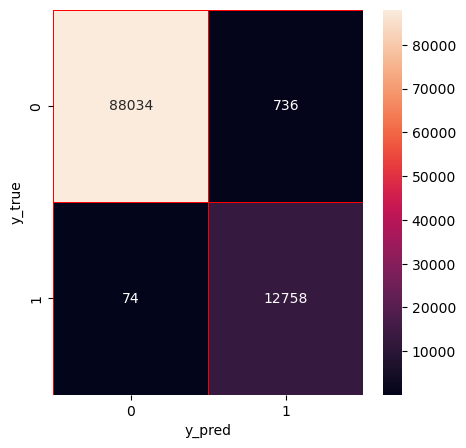

In [21]:
import lightgbm as lgb
model = lgb.LGBMClassifier(**opt_params).fit(X_train, y_train)

y_pred = model.predict(X_cv)
print(classification_report(y_cv,y_pred))
print("Accuracy of LGBM: "+ str(accuracy_score(y_cv, y_pred)))
print("Precision of LGBM: "+ str(precision_score(y_cv, y_pred, average='weighted')))
print("Recall of LGBM: "+ str(recall_score(y_cv, y_pred, average='weighted')))
print("Average F1 of LGBM: "+ str(f1_score(y_cv, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_cv, y_pred, average=None)))
xg_f1=f1_score(y_cv, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_cv,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**We prioritize recall over precision. this means that we want to minimize false negatives even if it leads to more false positives. In other words, we want to ensure that the model correctly identifies as many positive instances as possible, even if it means some of those instances are actually negative and this helps intrusion detection system become more sensible to attacks. It is safer to assume an attack is being executed even it is not an attack then having the opposite senario. That is why we chose LGBM because it has recal_LGBM=0.99 > real_Xgboost=0.98 .**

In [24]:
model.booster_.save_model("/kaggle/working/lightgbm_model.txt")